In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-02-23 16:43:04--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-02-23 16:43:04 (61.5 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [3]:
def model(x,m,b):
   return m * x + b

In [4]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [5]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

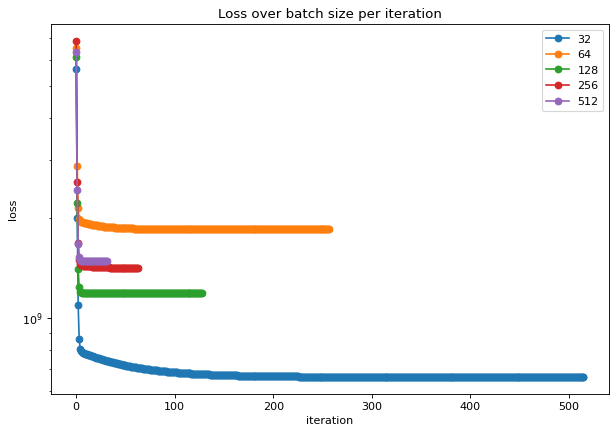

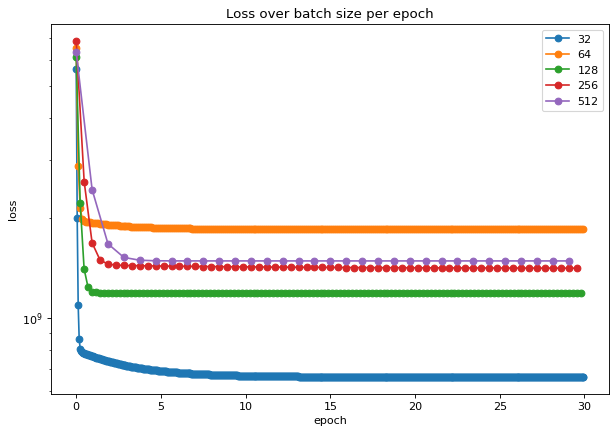

In [6]:
batch_sizes = [32,64,128,256,512]
loss_history_bs = []
for batch_size in batch_sizes:
  # set our initial slope and intercept
  m = 5.
  b = 1000.
  # set a learning rate for each parameter
  learning_rate_m = 1e-7
  learning_rate_b = 1e-1
  # use these to plot our progress over time
  loss_history = []
  # convert panda data batch to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
  data_batch = data.sample(batch_size)
  data_x = data_batch['GrLivArea'].to_numpy()
  data_y = data_batch['SalePrice'].to_numpy()
  # we run our loop N times
  loop_N = 30*len(data)//batch_size
  for i in range(loop_N):
    # update our slope and intercept based on the current values
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)

    # calculate the loss value
    loss_value = np.mean(loss(data_x,data_y,m,b))

    # keep a history of our loss values
    loss_history.append(loss_value)

  # keep a history of our loss histories over batch sizes
  loss_history_bs.append(loss_history)

# create a plot for the losses over the bs
fig = plt.figure(figsize=(9,6),dpi=80)
# plot the losses
for loss_history in loss_history_bs:
  loss_x = np.arange(0,len(loss_history))
  loss_y = np.asarray(loss_history)
  plt.plot(loss_x,loss_y, 'o-')
  #plt.hold('on')
plt.legend(batch_sizes)
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss over batch size per iteration')
plt.show()

# create a plot for the losses over the bs for each epoch
fig = plt.figure(figsize=(9,6),dpi=80)
# plot the losses
for loss_history,batch_size in zip(loss_history_bs,batch_sizes):
  num_batches = (30*len(data)//batch_size)/30
  loss_x = np.arange(0,len(loss_history))/num_batches
  loss_y = np.asarray(loss_history)
  plt.plot(loss_x,loss_y, 'o-')
  #plt.hold('on')
plt.legend(batch_sizes)
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss over batch size per epoch')
plt.show()


